In [14]:
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [46]:
N = 1000
X = np.random.random(size=(N, 2)) * 6 - 3
Y = np.cos(2 * X[:, 0]) + np.cos(3 * X[:, 1])

<IPython.core.display.Javascript object>


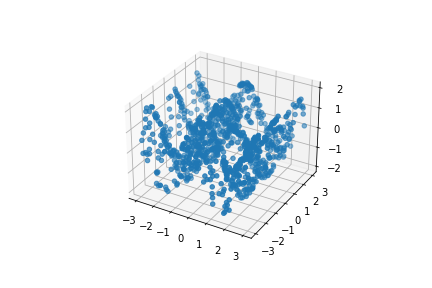

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)

In [47]:
model = nn.Sequential(
    nn.Linear(2, 128), 
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [48]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [49]:
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
    train_losses = np.zeros(epochs)
    
    for epoch in range(epochs):
        optimizer.zero_grad()
        
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        train_losses[epoch] = loss.item()
        
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")
    return train_losses

In [50]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))

In [51]:
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Loss: 0.7734
Epoch 100/1000, Loss: 0.4826
Epoch 150/1000, Loss: 0.3290
Epoch 200/1000, Loss: 0.1783
Epoch 250/1000, Loss: 0.0516
Epoch 300/1000, Loss: 0.0143
Epoch 350/1000, Loss: 0.0075
Epoch 400/1000, Loss: 0.0050
Epoch 450/1000, Loss: 0.0041
Epoch 500/1000, Loss: 0.0040
Epoch 550/1000, Loss: 0.0041
Epoch 600/1000, Loss: 0.0035
Epoch 650/1000, Loss: 0.0035
Epoch 700/1000, Loss: 0.0033
Epoch 750/1000, Loss: 0.0061
Epoch 800/1000, Loss: 0.0032
Epoch 850/1000, Loss: 0.0094
Epoch 900/1000, Loss: 0.0032
Epoch 950/1000, Loss: 0.0031
Epoch 1000/1000, Loss: 0.0031


<IPython.core.display.Javascript object>


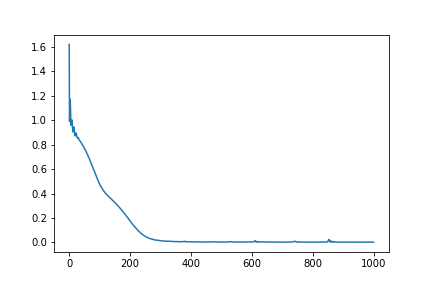

In [52]:
plt.plot(train_losses)

<IPython.core.display.Javascript object>


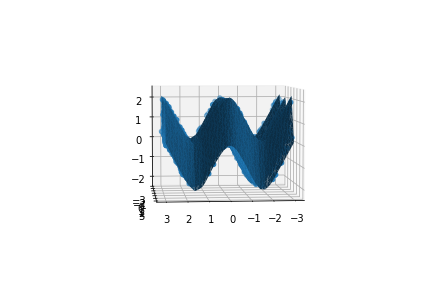

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)

with torch.no_grad():
    line = np.linspace(-3, 3, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
    plt.show()

<IPython.core.display.Javascript object>


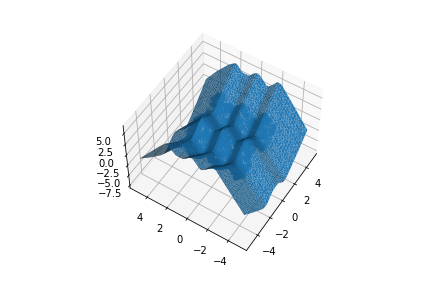

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)

with torch.no_grad():
    line = np.linspace(-5, 5, 50)
    xx, yy = np.meshgrid(line, line)
    Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
    Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
    Yhat = model(Xgrid_torch).numpy().flatten()
    ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
    plt.show()